#Análise do tempo de viagem no sistema de transporte coletivo de maceió

In [1]:
# Bibliotecas fundamentais
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Extração e obtenção dos dados

url = 'https://github.com/Miller202/desafio-smtt/blob/main/viagens.csv?raw=true'
dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
0,0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45,40.0,ida
1,1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45,40.0,volta
2,2,3,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:00:00,2020-10-04 06:58:00,45,43.0,ida
3,3,4,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:45:00,2020-10-04 07:42:00,45,44.0,volta
4,4,5,1,87.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 08:30:00,2020-10-04 08:31:00,45,44.0,ida


In [3]:
# Ajuste de dados (Tratamento / Limpeza)

dados = dados.drop('Unnamed: 0', axis=1) #coluna inútil
dados = dados.dropna() #dropar linhas com valores nulos

#como estamos tratando de tempo de viagem, não fazem sentido viagens com tempo negativo
dados = dados[(dados['duracao_total_realizada'] > 0) & (dados['duracao_realizada'] > 0)]

#coluna de duracao prevista deve ter mesmo tipo da duracao realizada
dados['duracao_prevista'] = dados['duracao_prevista'].astype(float)

#informações gerais
print('linhas x colunas:', dados.shape, '\n')
print(dados.info(), '\n')
dados.head()

linhas x colunas: (18137, 13) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18137 entries, 0 to 21698
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   numero_viagem_da_linha_no_dia  18137 non-null  int64  
 1   ordem_veiculo_na_linha_no_dia  18137 non-null  int64  
 2   duracao_total_realizada        18137 non-null  float64
 3   nome_linha                     18137 non-null  object 
 4   atendimento                    18137 non-null  object 
 5   empresa                        18137 non-null  object 
 6   numero_ordem_veiculo           18137 non-null  int64  
 7   numero_linha                   18137 non-null  int64  
 8   hora_prevista                  18137 non-null  object 
 9   hora_realizada                 18137 non-null  object 
 10  duracao_prevista               18137 non-null  float64
 11  duracao_realizada              18137 non-null  float64
 12  sentido_viagem

,numero_viagem_da_linha_no_dia,ordem_veiculo_na_linha_no_dia,duracao_total_realizada,nome_linha,atendimento,empresa,numero_ordem_veiculo,numero_linha,hora_prevista,hora_realizada,duracao_prevista,duracao_realizada,sentido_viagem
0,1,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 05:30:00,2020-10-04 05:26:00,45.0,40.0,ida
1,2,1,80.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 06:15:00,2020-10-04 06:06:00,45.0,40.0,volta
2,3,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:00:00,2020-10-04 06:58:00,45.0,43.0,ida
3,4,1,88.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 07:45:00,2020-10-04 07:42:00,45.0,44.0,volta
4,5,1,87.0,Village Campestre II X Centro / Farol,Village Campestre II X Centro / Farol,Real Transportes Urbanos Ltda.,4636,46,2020-10-04 08:30:00,2020-10-04 08:31:00,45.0,44.0,ida


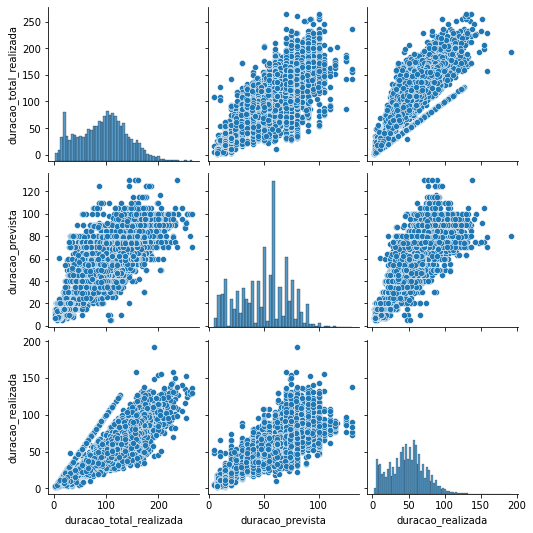

In [4]:
# Análise exploratória

dados_tempo = dados[['duracao_total_realizada', 'duracao_prevista', 'duracao_realizada']]
sns.pairplot(dados_tempo)

In [5]:
dados_tempo.corr()

,duracao_total_realizada,duracao_prevista,duracao_realizada
duracao_total_realizada,1.000000,0.870889,0.912273
duracao_prevista,0.870889,1.000000,0.875238
duracao_realizada,0.912273,0.875238,1.000000


In [30]:
pd.crosstab(dados.sentido_viagem, dados.empresa)

empresa,Auto Viação Veleiro LTDA,Empresa São Francisco,Real Transportes Urbanos Ltda.,Viação Cidade de Maceió
sentido_viagem,,,,
ida,760,2817,2503,3246
volta,678,2551,2515,3067


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


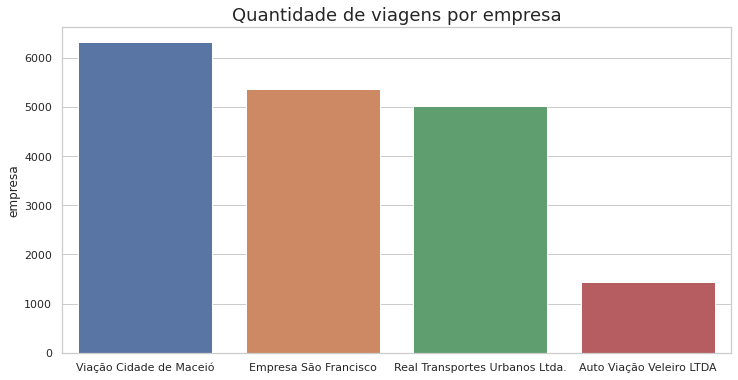

In [12]:
dados_empresa = pd.DataFrame(dados.empresa.value_counts())
x = dados_empresa.index
y = dados_empresa.empresa

plt.figure(figsize=(12,6))
plt.title('Quantidade de viagens por empresa', fontsize=18)
sns.set_theme(style="whitegrid")
sns.barplot(x, y)
plt.show()

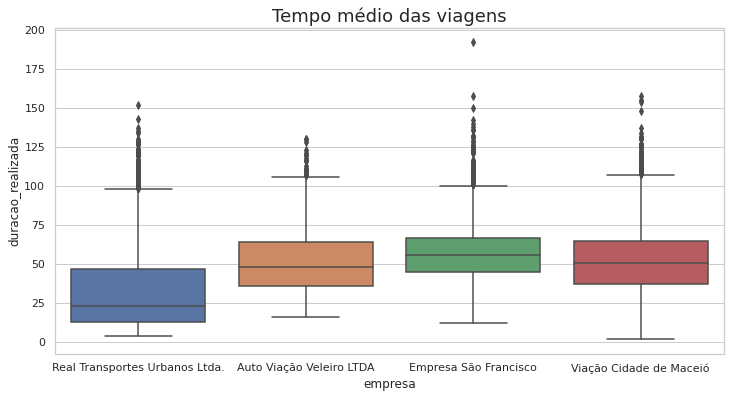

In [27]:
plt.figure(figsize=(12,6))
plt.title('Tempo médio das viagens', fontsize=18)
sns.boxplot(y='duracao_realizada', x='empresa', data=dados)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


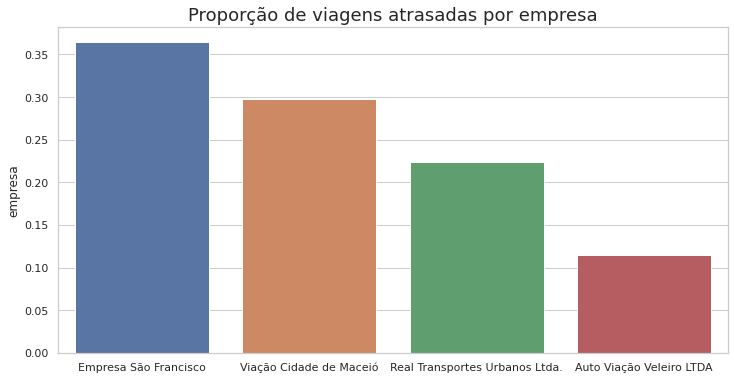

In [11]:
dados_empresa = pd.DataFrame(dados.empresa[dados.duracao_realizada > dados.duracao_prevista].value_counts(normalize=True))
x = dados_empresa.index
y = dados_empresa.empresa

plt.figure(figsize=(12,6))
plt.title('Proporção de viagens atrasadas por empresa', fontsize=18)
sns.set_theme(style="whitegrid")
sns.barplot(x, y)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


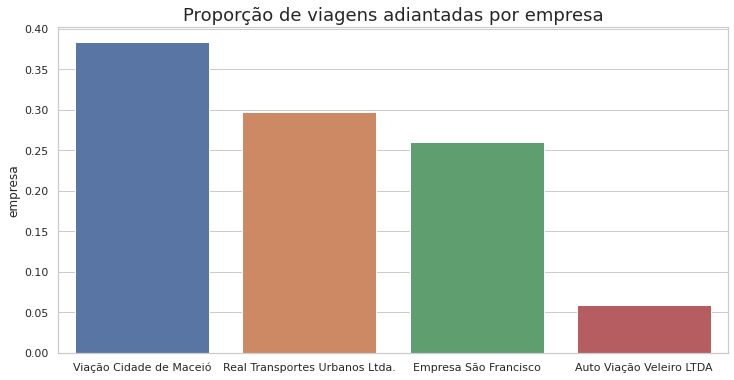

In [10]:
dados_empresa = pd.DataFrame(dados.empresa[dados.duracao_realizada < dados.duracao_prevista].value_counts(normalize=True))
x = dados_empresa.index
y = dados_empresa.empresa

plt.figure(figsize=(12,6))
plt.title('Proporção de viagens adiantadas por empresa', fontsize=18)
sns.set_theme(style="whitegrid")
sns.barplot(x, y)
plt.show()